# IST-718 Numpy Tutorial

Credit:  This tutorial was adapted from the Stanford [Stanford CS-228](https://github.com/kuleshov/cs228-material/blob/master/tutorials/python/cs228-python-tutorial.ipynb) python tutorial.

## Numpy

Numpy is the core library for scientific computing in Python. It provides a high-performance multidimensional array object, and tools for working with these array objects. If you are already familiar with MATLAB, you might find this [tutorial](http://wiki.scipy.org/NumPy_for_Matlab_Users) useful to get started with Numpy.

To use Numpy, we first need to import the `numpy` package:

In [ ]:
import numpy as np

### Arrays

A numpy array is a grid of values, all of the same type, and indexed by a tuple of nonnegative integers. The number of dimensions is the rank of the array; the shape of an array is a tuple of integers giving the size of the array along each dimension.

We can initialize numpy arrays from nested Python lists, and access elements using square brackets:

In [ ]:
a = np.array([1, 2, 3])  # Create a rank 1 array
print("a:", a)
print("type(a):", type(a))
print("a.shape:", a.shape)
print("a[0] a[1] a[2]:", a[0], a[1], a[2])
a[0] = 5                 # Change an element of the array
print("changed a:", a)                  

a: [1 2 3]
type(a): <class 'numpy.ndarray'>
a.shape: (3,)
a[0] a[1] a[2]: 1 2 3
changed a: [5 2 3]


In [ ]:
b = np.array([[1,2,3],[4,5,6]])   # Create a rank 2 array
print("b:\n", b)

b:
 [[1 2 3]
 [4 5 6]]


In [ ]:
print("b.shape:", b.shape)
print(b[0, 0], b[0, 1], b[1, 0])

b.shape: (2, 3)
1 2 4


Numpy also provides many functions to create arrays:

In [ ]:
a = np.zeros((2,2))  # Create an array of all zeros
print(a)

[[0. 0.]
 [0. 0.]]


In [ ]:
b = np.ones((1,2))   # Create an array of all ones
print(b)

[[1. 1.]]


In [ ]:
c = np.full((2,2), 7) # Create a constant array
print(c) 

[[7 7]
 [7 7]]


In [ ]:
d = np.eye(2)        # Create a 2x2 identity matrix
print(d)

[[1. 0.]
 [0. 1.]]


In [ ]:
e = np.random.random((2,2)) # Create an array filled with random values
print(e)

[[0.64672504 0.19907479]
 [0.19128753 0.1431508 ]]


### Array indexing

Numpy offers several ways to index into arrays.

Slicing: Similar to Python lists, numpy arrays can be sliced. Since arrays may be multidimensional, you must specify a slice for each dimension of the array:

In [ ]:
import numpy as np

# Create the following rank 2 array with shape (3, 4)
# [[ 1  2  3  4]
#  [ 5  6  7  8]
#  [ 9 10 11 12]]
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])
print("a:")
print(a)

# Use slicing to pull out the subarray consisting of the first 2 rows
# and columns 1 and 2; b is the following array of shape (2, 2):
# [[2 3]
#  [6 7]]
b = a[:2, 1:3]
print("b:")
print(b)

a:
[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]
b:
[[2 3]
 [6 7]]


A slice of an array is a view into the same data, so modifying it will modify the original array.

In [ ]:
print(a[0, 1])  
b[0, 0] = 77    # b[0, 0] is the same piece of data as a[0, 1]
print(a[0, 1])

2
77


You can also mix integer indexing with slice indexing. However, doing so will yield an array of lower rank than the original array. Note that this is quite different from the way that MATLAB handles array slicing:

In [ ]:
# Create the following rank 2 array with shape (3, 4)
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])
print(a)

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]


Two ways of accessing the data in the middle row of the array.
Mixing integer indexing with slices yields an array of lower rank,
while using only slices yields an array of the same rank as the
original array:

In [ ]:
row_r1 = a[1, :]    # Rank 1 view of the second row of a  
row_r2 = a[1:2, :]  # Rank 2 view of the second row of a
row_r3 = a[[1], :]  # Rank 2 view of the second row of a
print("a:")
print(a)
print("a.shape", a.shape)
print("row_r1", row_r1, row_r1.shape) 
print("row_r2", row_r2, row_r2.shape)
print("row_r3", row_r3, row_r3.shape)

a:
[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]
a.shape (3, 4)
row_r1 [5 6 7 8] (4,)
row_r2 [[5 6 7 8]] (1, 4)
row_r3 [[5 6 7 8]] (1, 4)


In [ ]:
# We can make the same distinction when accessing columns of an array:
col_r1 = a[:, 1]
col_r2 = a[:, 1:2]
print("col_r1:\n", col_r1, col_r1.shape)
print()
print("col_r2:\n", col_r2, col_r2.shape)

col_r1:
 [ 2  6 10] (3,)

col_r2:
 [[ 2]
 [ 6]
 [10]] (3, 1)


Integer array indexing: When you index into numpy arrays using slicing, the resulting array view will always be a subarray of the original array. In contrast, integer array indexing allows you to construct arbitrary new arrays using the data from another array. Here is an example:

In [ ]:
a = np.array([[1,2], [3, 4], [5, 6]])
print("a:\n", a)
print("a.shape", a.shape)

# An example of integer array indexing.
# The returned array will have shape (3,)
foo = a[[0, 1, 2], [0, 1, 0]]
print("foo", foo, foo.shape)

# The above example of integer array indexing is equivalent to this:
bar = np.array([a[0, 0], a[1, 1], a[2, 0]])
print("bar", bar, bar.shape)

# note that a does not change when we change foo
print("Change Test 1:")
foo[0] = 99
print("foo:\n", foo)
print("a:\n", a)

# note a does not change when when we change bar either
print("Change Test 2:")
bar[0] = 10
print("bar:\n", bar)
print("a:\n", a)

a:
 [[1 2]
 [3 4]
 [5 6]]
a.shape (3, 2)
foo [1 4 5] (3,)
bar [1 4 5] (3,)
Change Test 1:
foo:
 [99  4  5]
a:
 [[1 2]
 [3 4]
 [5 6]]
Change Test 2:
bar:
 [10  4  5]
a:
 [[1 2]
 [3 4]
 [5 6]]


In [ ]:
# When using integer array indexing, you can reuse the same
# element from the source array.  Here we create a new array 
# using element 0,1 in matrix a twice.
print("a:\n", a)
print()
print("a[[0, 0], [1, 1]] ==>", a[[0, 0], [1, 1]])

# Equivalent to the previous integer array indexing example
print("np.array([a[0, 1], a[0, 1]] ==>", np.array([a[0, 1], a[0, 1]]))

a:
 [[1 2]
 [3 4]
 [5 6]]

a[[0, 0], [1, 1]] ==> [2 2]
np.array([a[0, 1], a[0, 1]] ==> [2 2]


One useful trick with integer array indexing is selecting or mutating one element from each row of a matrix:

In [ ]:
# Create a new array from which we will select elements
a = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
print("a:\n", a)

a:
 [[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]


In [ ]:
# Create an array of indices
b = np.array([0, 2, 0, 1])

# Select one element from each row of a using the indices in b
print(a[np.arange(a.shape[0]), b])  # Prints "[ 1  6  7 11]"

[ 1  6  7 11]


In [ ]:
# Mutate one element from each row of a using the indices in b
a[np.arange(a.shape[0]), b] += 10
print(a)

[[11  2  3]
 [ 4  5 16]
 [17  8  9]
 [10 21 12]]


Boolean array indexing: Boolean array indexing lets you pick out arbitrary elements of an array. Frequently this type of indexing is used to select the elements of an array that satisfy some condition. Here is an example:

In [ ]:
a = np.array([[1,2], [3, 4], [5, 6]])
print("a:\n", a)

bool_idx = (a > 2)  # Find the elements of a that are bigger than 2;
                    # this returns a numpy array of Booleans of the same
                    # shape as a, where each slot of bool_idx tells
                    # whether that element of a is > 2.

print("bool_idx:\n", bool_idx)

a:
 [[1 2]
 [3 4]
 [5 6]]
bool_idx:
 [[False False]
 [ True  True]
 [ True  True]]


In [ ]:
# We use boolean array indexing to construct a rank 1 array
# consisting of the elements of values corresponding to the True values
# of bool_idx
print("a[bool_idx]:", a[bool_idx])

# We can do all of the above in a single concise statement:
print("a[a > 2]:", a[a > 2])

a[bool_idx]: [3 4 5 6]
a[a > 2]: [3 4 5 6]


For brevity we have left out a lot of details about numpy array indexing; if you want to know more you should read the documentation.  Note that the assigned reading in Python Data Science Handbook is a great source of information.

### Activity:  Reverse the rows and cols in the following matrix:

In [ ]:
foo = np.arange(9).reshape(3,3)
print("foo:\n", foo)

# Your Code Here

# the result should look like this:
#[[8 7 6]
# [5 4 3]
# [2 1 0]]

### Datatypes

Every numpy array is a grid of elements of the same type. Numpy provides a large set of numeric datatypes that you can use to construct arrays. Numpy tries to guess a datatype when you create an array, but functions that construct arrays usually also include an optional argument to explicitly specify the datatype. Here is an example:

In [ ]:
x = np.array([1, 2])  # Let numpy choose the datatype
y = np.array([1.0, 2.0])  # Let numpy choose the datatype
z = np.array([1, 2], dtype=np.int64)  # Force a particular datatype

print(x.dtype, y.dtype, z.dtype)

int64 float64 int64


You can read all about numpy datatypes in the [documentation](http://docs.scipy.org/doc/numpy/reference/arrays.dtypes.html).

### Array math

Basic mathematical functions operate elementwise on arrays, and are available both as operator overloads and as functions in the numpy module:

In [ ]:
x = np.array([[1,2],[3,4]], dtype=np.float64)
y = np.array([[5,6],[7,8]], dtype=np.float64)

# Elementwise sum; both produce the array
print("x:\n", x)
print("y:\n", y)
print("x+y:\n", x + y)
print("np.add(x,y):\n", np.add(x, y))

x:
 [[1. 2.]
 [3. 4.]]
y:
 [[5. 6.]
 [7. 8.]]
x+y:
 [[ 6.  8.]
 [10. 12.]]
np.add(x,y):
 [[ 6.  8.]
 [10. 12.]]


In [ ]:
# Elementwise difference; both produce the array
print("x:\n", x)
print("y:\n", y)
print("x-y:\n", x - y)
print("np.subtract(x, y):\n", np.subtract(x, y))

x:
 [[1. 2.]
 [3. 4.]]
y:
 [[5. 6.]
 [7. 8.]]
x-y:
 [[-4. -4.]
 [-4. -4.]]
np.subtract(x, y):
 [[-4. -4.]
 [-4. -4.]]


In [ ]:
# Elementwise product; both produce the array
print("x:\n", x)
print("y:\n", y)
print("x*y:\n", x * y)
print("np.multiply(x, y):\n", np.multiply(x, y))

x:
 [[1. 2.]
 [3. 4.]]
y:
 [[5. 6.]
 [7. 8.]]
x*y:
 [[ 5. 12.]
 [21. 32.]]
np.multiply(x, y):
 [[ 5. 12.]
 [21. 32.]]


In [ ]:
# Elementwise division; both produce the array
# [[ 0.2         0.33333333]
#  [ 0.42857143  0.5       ]]
print("x:\n", x)
print("y:\n", y)
print("x/y:\n", x / y)
print("np.divide(x, y):\n", np.divide(x, y))

x:
 [[1. 2.]
 [3. 4.]]
y:
 [[5. 6.]
 [7. 8.]]
x/y:
 [[0.2        0.33333333]
 [0.42857143 0.5       ]]
np.divide(x, y):
 [[0.2        0.33333333]
 [0.42857143 0.5       ]]


In [ ]:
# Elementwise square root; produces the array
# [[ 1.          1.41421356]
#  [ 1.73205081  2.        ]]
print("x:\n", x)
print("np.sqrt(x):\n", np.sqrt(x))

x:
 [[1. 2.]
 [3. 4.]]
np.sqrt(x):
 [[1.         1.41421356]
 [1.73205081 2.        ]]


Note that unlike MATLAB, `*` is elementwise multiplication, not matrix multiplication. We instead use the dot function to compute inner products of vectors, to multiply a vector by a matrix, and to multiply matrices. dot is available both as a function in the numpy module and as an instance method of array objects:

In [ ]:
v = np.array([9,10])
w = np.array([11, 12])

# Inner product of vectors; both produce 219
print("v:\n", v)
print("w:\n", w)
print("v.dot(w):", v.dot(w))
print("np.dot(v, w):", np.dot(v, w))

v:
 [ 9 10]
w:
 [11 12]
v.dot(w): 219
np.dot(v, w): 219


In the following cell, v has the shape (2,) which means that it is a one dimensional array.  Note that this is not not a well defined problem because strictly speaking, in the dot product of A and B, the number of columns in A must equal the number of rows in B.  The np.dot function has rules to deal with this and uses a "sum product".  Note that the resulting dimension is (2,) indicating a single dimension array.  See help for the numpy dot funciton:  https://docs.scipy.org/doc/numpy/reference/generated/numpy.dot.html#numpy.dot

In [ ]:
# Matrix / vector product; both produce the rank 1 array [29 67]
x = np.array([[1,2],[3,4]])
y = np.array([[5,6],[7,8]])
print("x:\n", x)
print("x.shape:", x.shape)
print("v:\n", v)
print("v.shape:", v.shape)
print("x.dot(v)")
print(x.dot(v))
print("np.dot(x, v)")
print(np.dot(x, v))
print("np.dot(x, v).shape:", np.dot(x, v).shape)

x:
 [[1 2]
 [3 4]]
x.shape: (2, 2)
v:
 [ 9 10]
v.shape: (2,)
x.dot(v)
[29 67]
np.dot(x, v)
[29 67]
np.dot(x, v).shape: (2,)


In the following cell, we redefine v (and call it v1) to have a better defined shape of (2,1).  Now np.dot(x, v1) produces the expected resulting shape of (2, 1).

In [ ]:
v1 = np.array([[9], [10]])
print("x:\n", x)
print("x.shape:", x.shape)
print("v1:\n", v1)
print("v1.shape:", v1.shape)
print("np.dot(x, v1):\n", np.dot(x, v1))
print("np.dot(x, v1).shape:\n", np.dot(x, v1).shape)

x:
 [[1 2]
 [3 4]]
x.shape: (2, 2)
v1:
 [[ 9]
 [10]]
v1.shape: (2, 1)
np.dot(x, v1):
 [[29]
 [67]]
np.dot(x, v1).shape:
 (2, 1)


In the next cell we compute the dot product of 2 matrices where each matrix has a shape of (2,2) resulting in a shape of (2,2).

In [ ]:
# Matrix / matrix product; both produce the rank 2 array
# [[19 22]
#  [43 50]]
print("x:\n", x)
print("y:\n", y)
print("x.dot(y):")
print(x.dot(y))
print("np.dot(x, y):")
print(np.dot(x, y))

x:
 [[1 2]
 [3 4]]
y:
 [[5 6]
 [7 8]]
x.dot(y):
[[19 22]
 [43 50]]
np.dot(x, y):
[[19 22]
 [43 50]]


Numpy provides many useful functions for performing computations on arrays; one of the most useful is `sum`:

In [ ]:
x = np.array([[1,2],[3,4]])

print(x)
print(np.sum(x))  # Compute sum of all elements; prints "10"
print(np.sum(x, axis=0))  # Compute sum of each column; prints "[4 6]"
print(np.sum(x, axis=1))  # Compute sum of each row; prints "[3 7]"

[[1 2]
 [3 4]]
10
[4 6]
[3 7]


You can find the full list of mathematical functions provided by numpy in the [documentation](http://docs.scipy.org/doc/numpy/reference/routines.math.html).

Apart from computing mathematical functions using arrays, we frequently need to reshape or otherwise manipulate data in arrays. The simplest example of this type of operation is transposing a matrix; to transpose a matrix, simply use the T attribute of an array object:

In [ ]:
print(x)
print(x.T)

[[1 2]
 [3 4]]
[[1 3]
 [2 4]]


In [ ]:
v = np.array([[1,2,3]])
print(v) 
print(v.T)

[[1 2 3]]
[[1]
 [2]
 [3]]


### Broadcasting

Broadcasting is a powerful mechanism that allows numpy to work with arrays of different shapes when performing arithmetic operations. Frequently we have a smaller array and a larger array, and we want to use the smaller array multiple times to perform some operation on the larger array.

For example, suppose that we want to add a constant vector to each row of a matrix. We could do it like this:

In [ ]:
# We will add the vector v to each row of the matrix x,
# storing the result in the matrix y
x = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
v = np.array([1, 0, 1])
y = np.empty_like(x)   # Create an empty matrix with the same shape as x

# Add the vector v to each row of the matrix x with an explicit loop
for i in range(y.shape[0]):
    y[i, :] = x[i, :] + v

print("x:\n", x)
print("v:\n", v)
print("y:\n", y)

x:
 [[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]
v:
 [1 0 1]
y:
 [[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]
 [11 11 13]]


This works; however when the matrix `x` is very large, computing an explicit loop in Python could be slow. Note that adding the vector v to each row of the matrix `x` is equivalent to forming a matrix `vv` by stacking multiple copies of `v` vertically, then performing elementwise summation of `x` and `vv`. We could implement this approach like this:

In [ ]:
vv = np.tile(v, (x.shape[0], 1))  # Stack 4 copies of v on top of each other
print("v:\n", v)
print("vv:\n", vv)                # Prints "[[1 0 1]
                                  #          [1 0 1]
                                  #          [1 0 1]
                                  #          [1 0 1]]"

v:
 [1 0 1]
vv:
 [[1 0 1]
 [1 0 1]
 [1 0 1]
 [1 0 1]]


In [ ]:
y = x + vv  # Add x and vv elementwise

print("x:\n", x)
print("vv:\n", vv)
print("x + vv:\n", y)

x:
 [[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]
vv:
 [[1 0 1]
 [1 0 1]
 [1 0 1]
 [1 0 1]]
x + vv:
 [[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]
 [11 11 13]]


Numpy broadcasting allows us to perform this computation without actually creating multiple copies of v. Consider this version, using broadcasting:

In [ ]:
import numpy as np

# We will add the vector v to each row of the matrix x,
# storing the result in the matrix y
x = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
v = np.array([1, 0, 1])
y = x + v  # Add v to each row of x using broadcasting

print("x:\n", x)
print("v:\n", v)
print("x + v:\n", y)

x:
 [[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]
v:
 [1 0 1]
x + v:
 [[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]
 [11 11 13]]


The line `y = x + v` works even though `x` has shape `(4, 3)` and `v` has shape `(3,)` due to broadcasting; this line works as if v actually had shape `(4, 3)`, where each row was a copy of `v`, and the sum was performed elementwise.

Broadcasting two arrays together follows these rules:

1. If the arrays do not have the same rank, prepend the shape of the lower rank array with 1s until both shapes have the same length.
2. The two arrays are said to be compatible in a dimension if they have the same size in the dimension, or if one of the arrays has size 1 in that dimension.
3. The arrays can be broadcast together if they are compatible in all dimensions.
4. After broadcasting, each array behaves as if it had shape equal to the elementwise maximum of shapes of the two input arrays.
5. In any dimension where one array had size 1 and the other array had size greater than 1, the first array behaves as if it were copied along that dimension

If this explanation does not make sense, try reading the explanation from the [documentation](http://docs.scipy.org/doc/numpy/user/basics.broadcasting.html) or this [explanation](https://jakevdp.github.io/PythonDataScienceHandbook/02.05-computation-on-arrays-broadcasting.html) from the Python Data Science Handbook.

Functions that support broadcasting are known as universal functions. You can find the list of all universal functions in the [documentation](http://docs.scipy.org/doc/numpy/reference/ufuncs.html#available-ufuncs).

Here are some applications of broadcasting:

In [ ]:
# Compute outer product of vectors
v = np.array([1,2,3])  # v has shape (3,)
w = np.array([4,5])    # w has shape (2,)
# To compute an outer product, we first reshape v to be a column
# vector of shape (3, 1); we can then broadcast it against w to yield
# an output of shape (3, 2), which is the outer product of v and w:

print("v:\n", v)
print("np.reshape(v, (3, 1)):\n", np.reshape(v, (3, 1)))
print("w:\n", w)
print("np.reshape(v, (3, 1)) * w:\n", np.reshape(v, (3, 1)) * w)

v:
 [1 2 3]
np.reshape(v, (3, 1)):
 [[1]
 [2]
 [3]]
w:
 [4 5]
np.reshape(v, (3, 1)) * w:
 [[ 4  5]
 [ 8 10]
 [12 15]]


In [ ]:
# Add a vector to each row of a matrix
x = np.array([[1,2,3], [4,5,6]])
# x has shape (2, 3) and v has shape (3,) so they broadcast to (2, 3),
# giving the following matrix:

print("x:\n", x)
print("v:", v)
print("x + v:\n", x + v)

x:
 [[1 2 3]
 [4 5 6]]
v: [1 2 3]
x + v:
 [[2 4 6]
 [5 7 9]]


In [ ]:
# Add a vector to each column of a matrix
# x has shape (2, 3) and w has shape (2,).
# If we transpose x then it has shape (3, 2) and can be broadcast
# against w to yield a result of shape (3, 2); transposing this result
# yields the final result of shape (2, 3) which is the matrix x with
# the vector w added to each column. Gives the following matrix:

print("x\n", x)
print("x.T:\n", x.T)
print("w:\n", w)
print("(x.T + w):\n", (x.T + w))
print("(x.T + w).T:\n", (x.T + w).T)

x
 [[1 2 3]
 [4 5 6]]
x.T:
 [[1 4]
 [2 5]
 [3 6]]
w:
 [4 5]
(x.T + w):
 [[ 5  9]
 [ 6 10]
 [ 7 11]]
(x.T + w).T:
 [[ 5  6  7]
 [ 9 10 11]]


In [ ]:
# Another solution is to reshape w to be a row vector of shape (2, 1);
# we can then broadcast it directly against x to produce the same
# output.
print("x:\n", x)
print("w:\n", w)
print("np.reshape(w, (2, 1)):\n", np.reshape(w, (2, 1)))
print("x + np.reshape(w, (2, 1))\n", x + np.reshape(w, (2, 1)))

x:
 [[1 2 3]
 [4 5 6]]
w:
 [4 5]
np.reshape(w, (2, 1)):
 [[4]
 [5]]
x + np.reshape(w, (2, 1))
 [[ 5  6  7]
 [ 9 10 11]]


In [ ]:
# Multiply a matrix by a constant:
# x has shape (2, 3). Numpy treats scalars as arrays of shape ();
# these can be broadcast together to shape (2, 3), producing the
# following array:
print("x:\n", x)
print("x * 2:\n", x * 2)

x:
 [[1 2 3]
 [4 5 6]]
x * 2:
 [[ 2  4  6]
 [ 8 10 12]]


Broadcasting typically makes your code more concise and faster, so you should strive to use it where possible.

### Numpy Statistical Operations

#### Sampling

In [ ]:
## Sample with replacement
# Create a sequence of integers
sequence = np.arange(1000)

# Take 100 samples with replacement using the uniform distribution
samp_replace = np.random.choice(sequence, 100)

# The following lines show exactly what values are duplicated in the samp_replace array
# find the unique sample values, counts, and indices of each unique value
unique, indices, counts = np.unique(samp_replace, return_counts=True, 
                                    return_index=True)

# filter the unique values by duplicates
duplicate_indices = unique[counts > 1]

# Find the duplicate values
duplicates = sequence[duplicate_indices]

print("Sampling with replacement produced the following duplicates:", duplicates)

Sampling with replacement produced the following duplicates: [338]


#### Expected Value

The following cell uses np.mean to calculate averages.  Note that np.mean assumes that the probability of each element is equal.

In [ ]:
# Simple mean
one_d_array=np.array([1,2,3,4,5])
print("one_d_array:", one_d_array)
print("np.mean(one_d_array):", np.mean(one_d_array))

# 2 dimensional matrix mean

# axis = None
two_d_array = np.array([[1,2,3],[4,5,6],[7,8,9]])
print("two_d_array:")
print(two_d_array)

# mean with axis = 0
print("Mean of axis 0 - column mean:", np.mean(two_d_array, axis=0))

# mean with axis = 1
print("Mean of axis 1 - row mean:", np.mean(two_d_array, axis=1))

one_d_array: [1 2 3 4 5]
np.mean(one_d_array): 3.0
two_d_array:
[[1 2 3]
 [4 5 6]
 [7 8 9]]
Mean of axis 0 - column mean: [4. 5. 6.]
Mean of axis 1 - row mean: [2. 5. 8.]


The next cell uses np.average to calculate means.  With np.average, the weight of each element can be specified.

In [ ]:
# weighted average
# average assuming that all weights are equal

x = [2,4,6,8,10]
print("x:", x)
print("np.average(x):", np.average(x))

# Average with varying weights
w = [.1, .2, .2, .3, .2]
print()
print("weights:", w)
print("np.average(x, weights=w)", np.average(x, weights=w))

x: [2, 4, 6, 8, 10]
np.average(x): 6.0

weights: [0.1, 0.2, 0.2, 0.3, 0.2]
np.average(x, weights=w) 6.6


#### Variance

The numpy variance function has a ddof parameter for "delta degrees of freedom".  When calculating the variance of sample data, set ddof to 1.  When calculating the variance of population data, set variance to 0.

In [ ]:
# Variance
x = np.array([1,2,3,4,5,6])

# sample variance
samp_variance = np.var(x, ddof=1)
print("samp_variance:", samp_variance)

# population variance
pop_variance = np.var(x, ddof=0)
print("pop_variance:", pop_variance)

samp_variance: 3.5
pop_variance: 2.9166666666666665


#### Standard Deviation

Standard deviation also has a ddof variable.  In general, set ddof to 1 for sample data and 0 for population data like variance.  However, since the square root function is not linear, it is possible to pick better values for ddof.

Actual sigma: 3
sigma_hat: 2.989829859354289


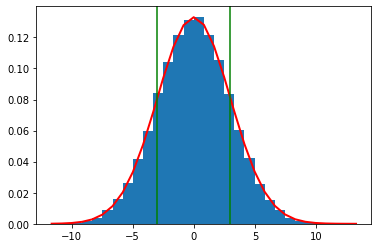

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline 

# define random normal characteristics
mu = 0
sigma = 3

# create an array of random normal data
rand_normal = np.random.normal(size=100000, loc=mu, scale=sigma)

_, bins, _ = plt.hist(rand_normal, density=True, bins=30)

# plot the true normal curve on top of the histogram
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * 
         np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')

# calculate the standard deviation of the generated data, assume ddof == 0 (population)
sigma_hat = np.std(rand_normal)

# plot sigma_hat
plt.axvline(mu+sigma_hat, color='g')
plt.axvline(mu-sigma_hat, color='g')

# print the calculated sigma hat
print("Actual sigma:", sigma)
print("sigma_hat:", sigma_hat)

#### Covariance

pop_cov_matrix:

[[ 6.66666667 -6.66666667]
 [-6.66666667  6.66666667]]
samp_cov_matrix:

[[ 7.5 -7.5]
 [-7.5  7.5]]


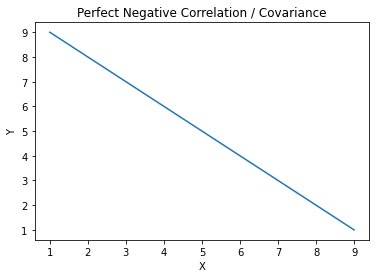

In [ ]:
# Define Negative Covariance Data
x = np.array([1,2,3,4,5,6,7,8,9])
y = np.array([9,8,7,6,5,4,3,2,1])

# plot 
plt.plot(x,y)
plt.title("Perfect Negative Correlation / Covariance")
plt.xlabel("X")
plt.ylabel("Y")

# population covariance
pop_cov_matrix = np.cov(x, y, ddof=0)
print("pop_cov_matrix:\n")
print(pop_cov_matrix)

# sample covariance
samp_cov_matrix = np.cov(x, y, ddof=1)
print("samp_cov_matrix:\n")
print(samp_cov_matrix)

#### Correlation

In [ ]:
# Define Negative Correlation Data
x = np.array([1,2,3,4,5,6,7,8,9])
y = np.array([9,8,7,6,5,4,3,2,1])

corr_matrix = np.corrcoef(x,y)
print("Perfect negative corr_matrix:\n", corr_matrix)
print()

# load the iris data set
from sklearn.datasets import load_iris
iris_data = load_iris()

# compute iris dataset correlation matrix
# The correlation matrix cols and rows follow the feature name sequence shown in the print out below
# note: rowvar = False tells np.cov that variables are in cols and obs in rows
iris_cor = np.corrcoef(iris_data.data, rowvar=False)
print("Iris feature names:", iris_data.feature_names)
print("Iris correlation matrix:\n", iris_cor)

Perfect negative corr_matrix:
 [[ 1. -1.]
 [-1.  1.]]

Iris feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Iris correlation matrix:
 [[ 1.         -0.11756978  0.87175378  0.81794113]
 [-0.11756978  1.         -0.4284401  -0.36612593]
 [ 0.87175378 -0.4284401   1.          0.96286543]
 [ 0.81794113 -0.36612593  0.96286543  1.        ]]


#### Central Limit Theorem Demo
This section demonstrates the use of the central limit theorem by sampling a binomial distribution.

#### Binomial Distribution
First we create and plot a binomial distribution - this doesn't look even close to being Gaussian!

[1 0 1 0 0 0 1 0 1 1]


Text(0, 0.5, 'Frequency')

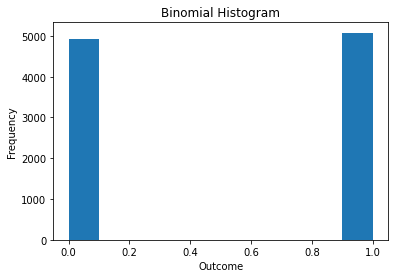

In [ ]:
# create 10,000 binomial data points
binomial_dat = np.random.binomial(1, 0.5, 10000)
print(binomial_dat[:10])

# plot the binomial data as a histogram
_, _, _ = plt.hist(binomial_dat)
plt.title("Binomial Histogram")
plt.xlabel("Outcome")
plt.ylabel("Frequency")

In the next cell we sample the binomial data with replacement to demonstrate the central limit theorem.  As the number of observations per sample increases towards 30, the resulting distribution looks more and more like a normal distribution.  The following cell does the work while demonstrating the map function.

[None, None, None, None, None, None, None]

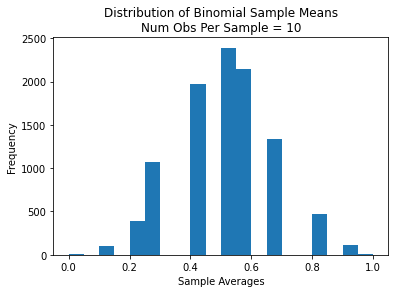

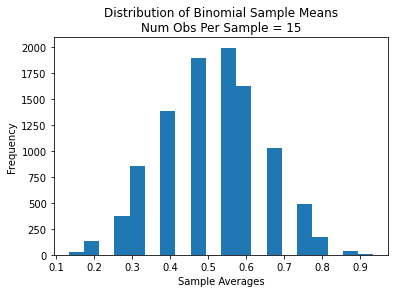

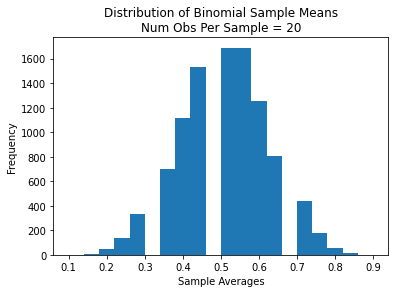

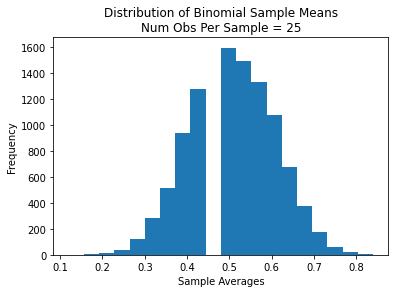

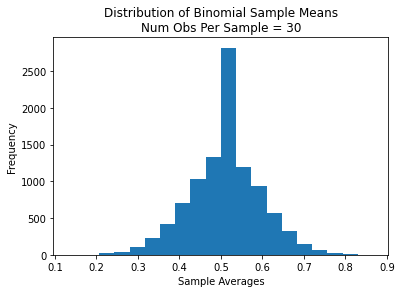

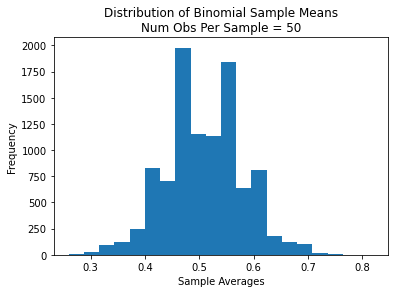

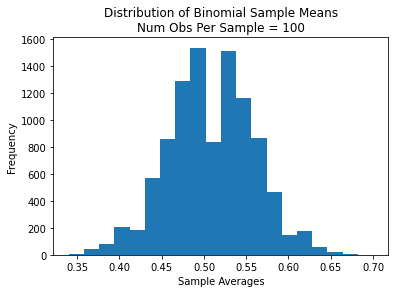

In [ ]:
# define the number of samples
# Note:  Its best to sample no more than 10% of the population 
num_samples = 10000

# Sample the binomial data with various numbers of observations per sample
num_obs_per_samp = [10, 15, 20, 25, 30, 50, 100]
    
# Draw num_samples with replacement from the binomial distributionl. Each sample
# has num_obs_per_samp observations per sample.  Take the mean of each sample.
sample_ave = np.array(list(map(lambda x: list(map(lambda num_obs: np.mean(np.random.choice(binomial_dat, num_obs)), 
                                                  num_obs_per_samp)), 
                      np.arange(num_samples))))

def create_histogram(sample_dat, num_obs):
    plt.figure()
    _, _, _ = plt.hist(sample_dat, bins=20)
    plt.title("Distribution of Binomial Sample Means\nNum Obs Per Sample = {}".format(num_obs))
    plt.xlabel("Sample Averages")
    plt.ylabel("Frequency")
    
result = map(lambda i: create_histogram(sample_ave[:, i], num_obs_per_samp[i]), np.arange(len(num_obs_per_samp)))
display(list(result))

The cell below does the same work as above but uses a traditional for loop instead of the map function.

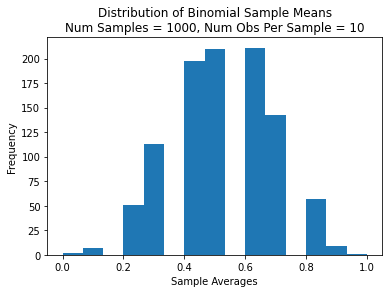

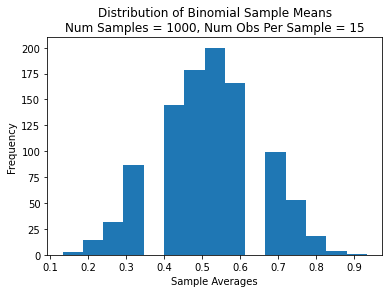

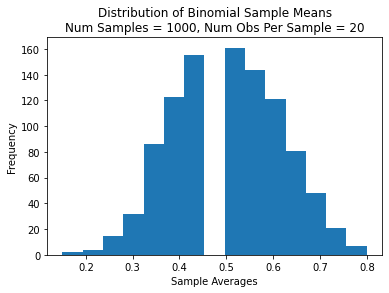

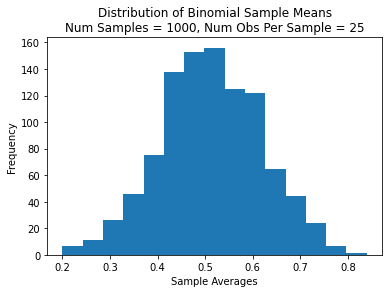

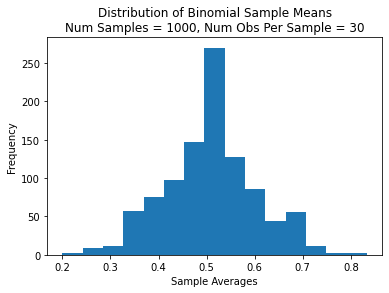

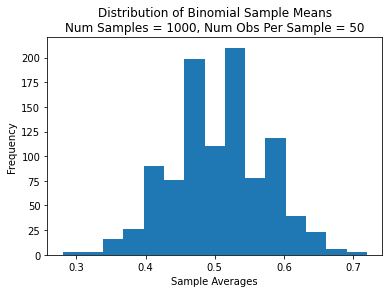

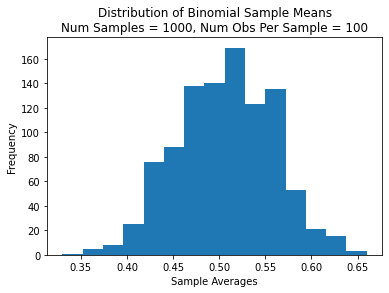

In [ ]:
# define the number of samples
num_samples = 1000

# Sample the binomial data with various numbers of observations per sample
num_obs_per_samp = [10, 15, 20, 25, 30, 50, 100]

# create a numpy array to store the sampling distribution of means
sample_ave = np.zeros(num_samples)

# for each number of observations per sample
for num_obs in num_obs_per_samp:
    i = 0
    while i < num_samples:
        # Draw num_samples with replacement from the binomial distributionl. Each sample
        # has num_obs_per_samp observations per sample.  Take the mean of each sample.
        sample_ave[i] = np.mean(np.random.choice(binomial_dat, num_obs))
        i = i + 1
        
    plt.figure()
    plt.hist(sample_ave, bins=15)
    plt.title("Distribution of Binomial Sample Means\nNum Samples = {}, Num Obs Per Sample = {}".format(num_samples, num_obs))
    plt.xlabel("Sample Averages")
    plt.ylabel("Frequency")

This brief overview has touched on many of the important things that you need to know about numpy, but is far from complete. Check out the [numpy reference](http://docs.scipy.org/doc/numpy/reference/) to find out much more about numpy.